## Importing Libraries

In [2]:
import sys
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import seaborn as sns
import matplotlib.pyplot as plt

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [3]:
b_df = get_bike_sharing_df() # See method in Model_Parent

In [4]:
b_df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Check Data

In [ ]:
# Check to make sure that no columns have perfect colinearity

<AxesSubplot:>

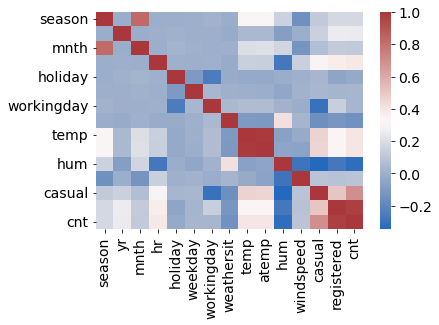

In [5]:
corr_mat = b_df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

In [4]:
# Drops the Casual and Registered rental count columns along with total rented bikes since they are essentially the same metric
X = b_df.iloc[:, :-3]
# We are trying to predict total bikes rented, not just casual or registered users
y = b_df.iloc[:, -1]

In [ ]:
# Droping temp because it is perfectly correlated with atemp
b_df.drop('temp', axis=1, inplace=True)

## Generating Models

### Linear Regression

In [5]:
model = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:08   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

[  3  84  67 ...   9 157 315]
[-36.80011036  89.57577532 119.78450772 ...  43.57353928  80.98305483
 191.09408441]
11
[ 40  32  36 ... 203 122 119]
[-68.04125506 -60.39975209  57.96270336 ... 176.61919623 208.98240845
 189.78048027]
11
[ 13   8  14 ... 224 247  49]
[-39.97740283  -1.25813929  25.18918497 ... 136.58488556 188.60298722
 216.74627192]
11
[ 16 106 110 ... 157 214  61]
[-75.16676706 116.69036954 110.17568434 ... 117.63618895 189.88987398
 224.59013959]
11
[  1   1   2 ... 164  89  90]
[-27.81250311 -28.89190842 -27.69251287 ... 202.80450287 195.77588842
 206.90783163]
12
[  3  84  67 ...   9 157 315]
[-36.68946361  89.67312261 119.88441539 ...  43.09886075  80.50664218
 190.60865251]
12
[ 40  32  36 ... 203 122 119]
[-68.14774666 -60.5068192   57.86265055 ... 177.10846898 209.46749082
 190.25968455]
12
[ 13   8  14 ... 224 247  49]
[-40.02899123  -1.31089431  25.13800979 ... 136.82713844 188.84858541
 216.98410023]
12
[ 16 106 110 ... 157 214  61]
[-74.74691025 117.07080468

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


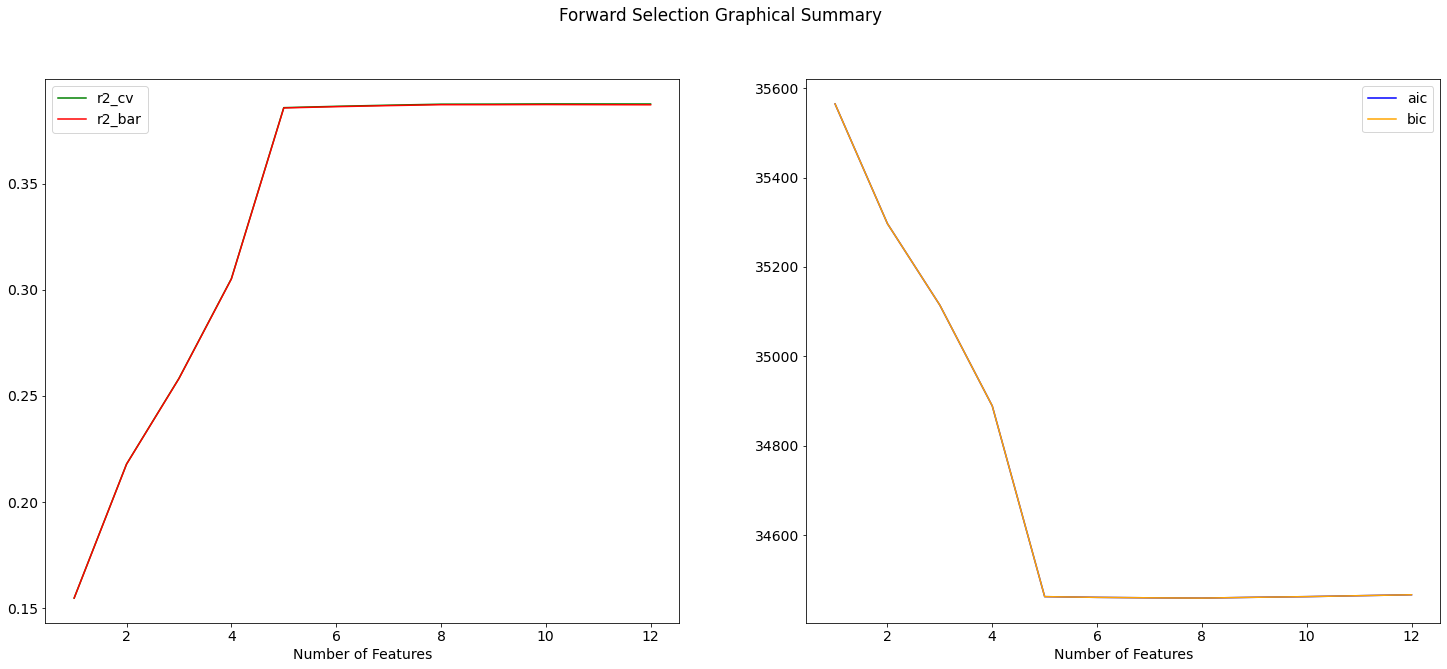

In [6]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:09   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


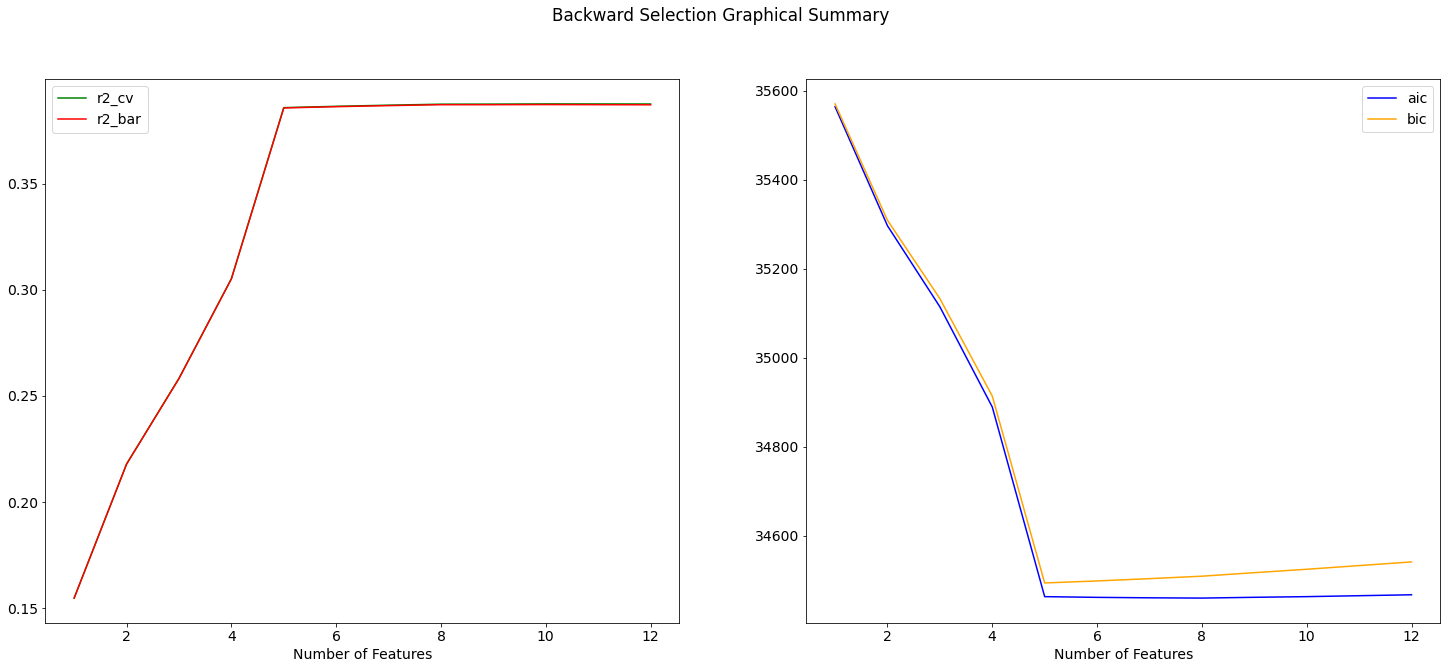

In [7]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:11   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


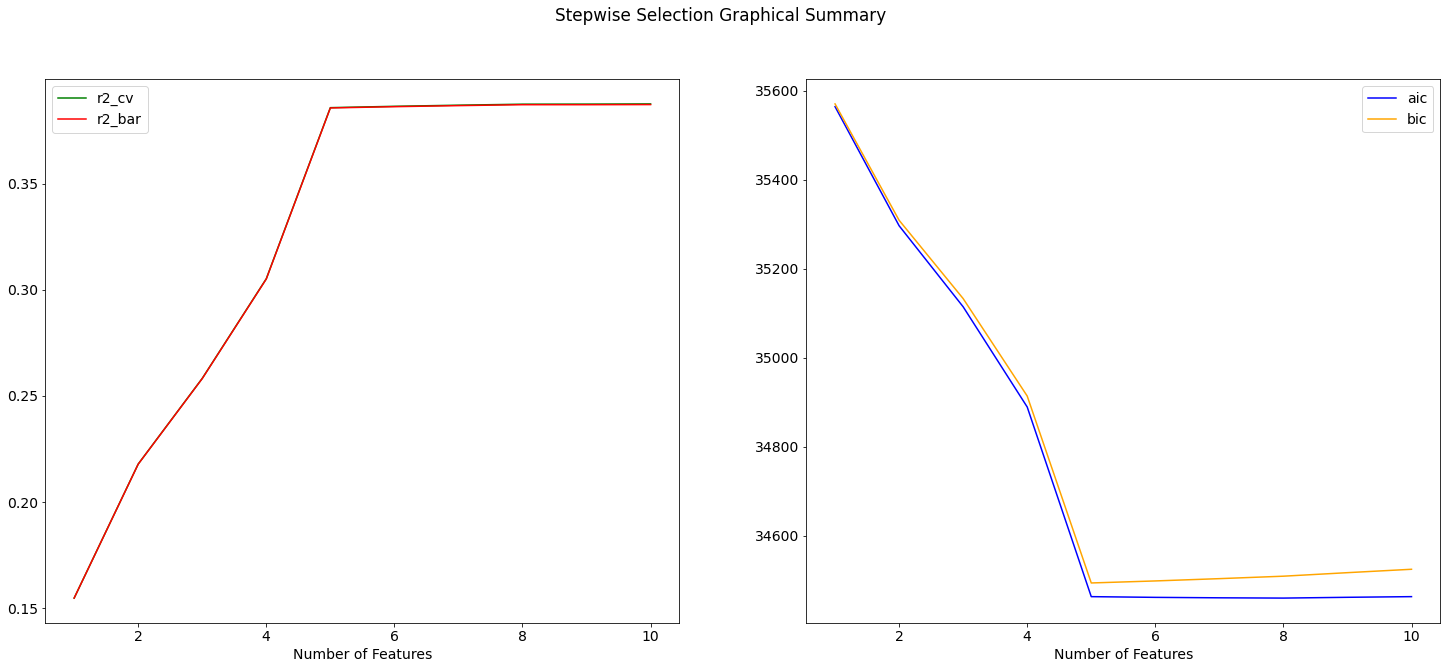

In [8]:
stepwiseSelection(model, X, y)

### Ridge Regression

In [9]:
model = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:12   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

[ 13   8  14 ... 224 247  49]
[-36.20840623   2.53814454  29.17407361 ... 135.02455115 186.84206248
 214.91159022]
10
[ 16 106 110 ... 157 214  61]
[-72.75859463 119.37719634 112.83751894 ... 116.43826995 188.74275866
 223.29254886]
10
[  1   1   2 ... 164  89  90]
[-28.09387303 -28.68375186 -27.96170263 ... 200.90505815 194.63063909
 205.89706273]
11
[  3  84  67 ...   9 157 315]
[-36.98896312  89.44825493 119.6511572  ...  43.97223031  80.86650905
 191.00363305]
11
[ 40  32  36 ... 203 122 119]
[-68.34322755 -60.69514964  57.76553998 ... 176.63277392 208.87291017
 189.93973026]
11
[ 13   8  14 ... 224 247  49]
[-40.25701359  -1.50595803  25.06519187 ... 136.83838711 188.63806135
 216.89016737]
11
[ 16 106 110 ... 157 214  61]
[-75.46296704 116.45847653 109.93816296 ... 117.68655863 189.95951039
 224.67136228]
11
[  1   1   2 ... 164  89  90]
[-28.38629892 -28.97565647 -28.26542117 ... 202.27187726 195.97561195
 207.23441409]
12
[  3  84  67 ...   9 157 315]
[-36.86457124  89.55766642

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


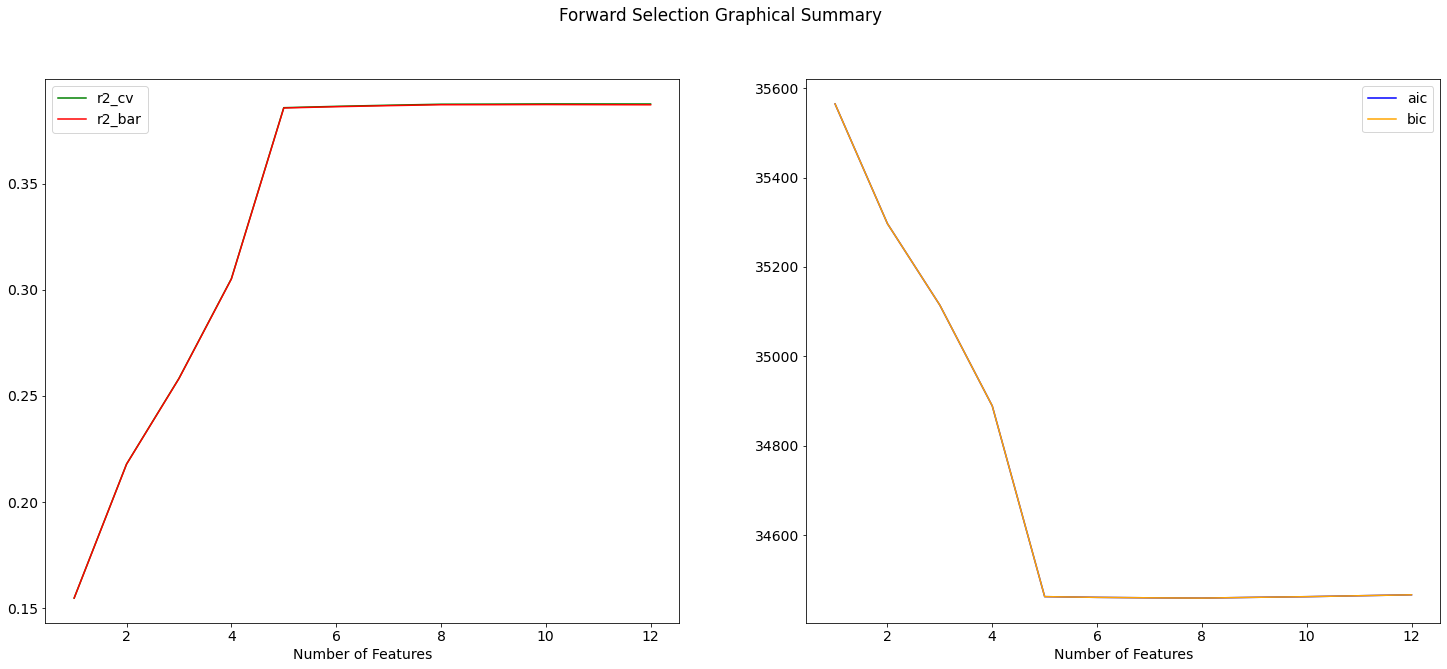

In [10]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:14   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


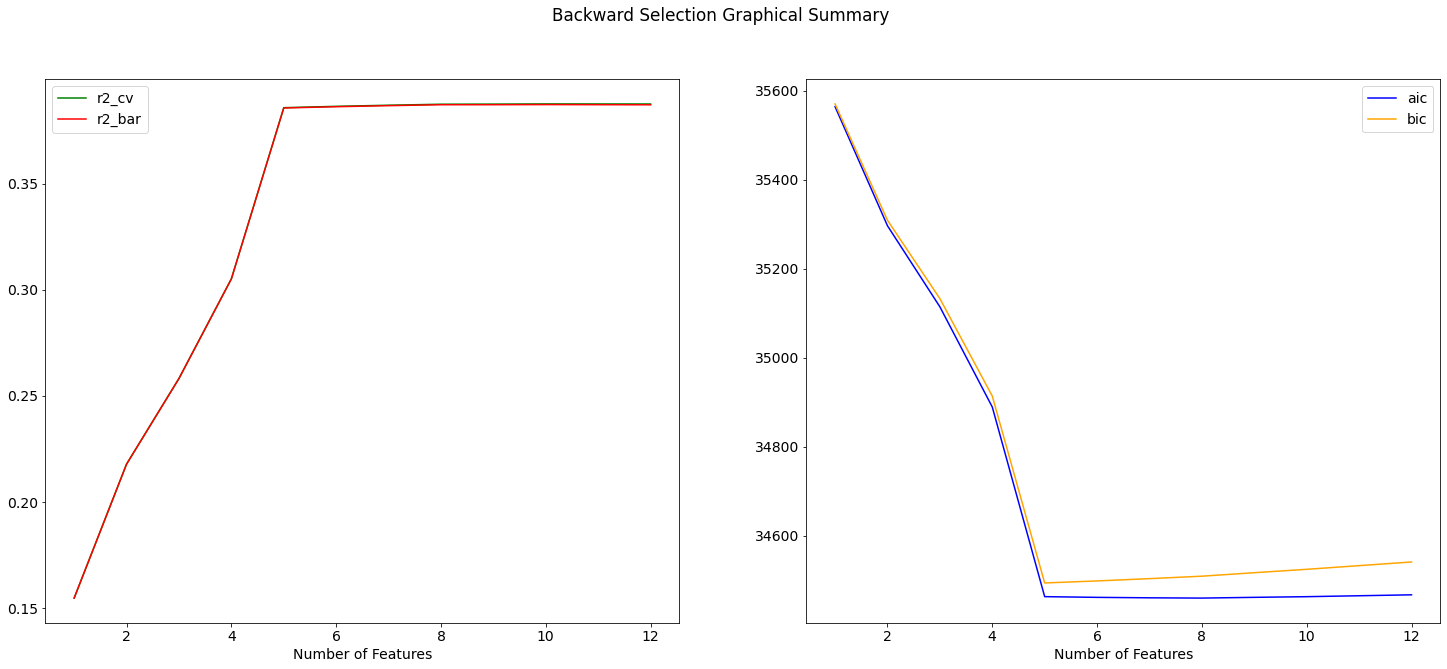

In [11]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:15   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


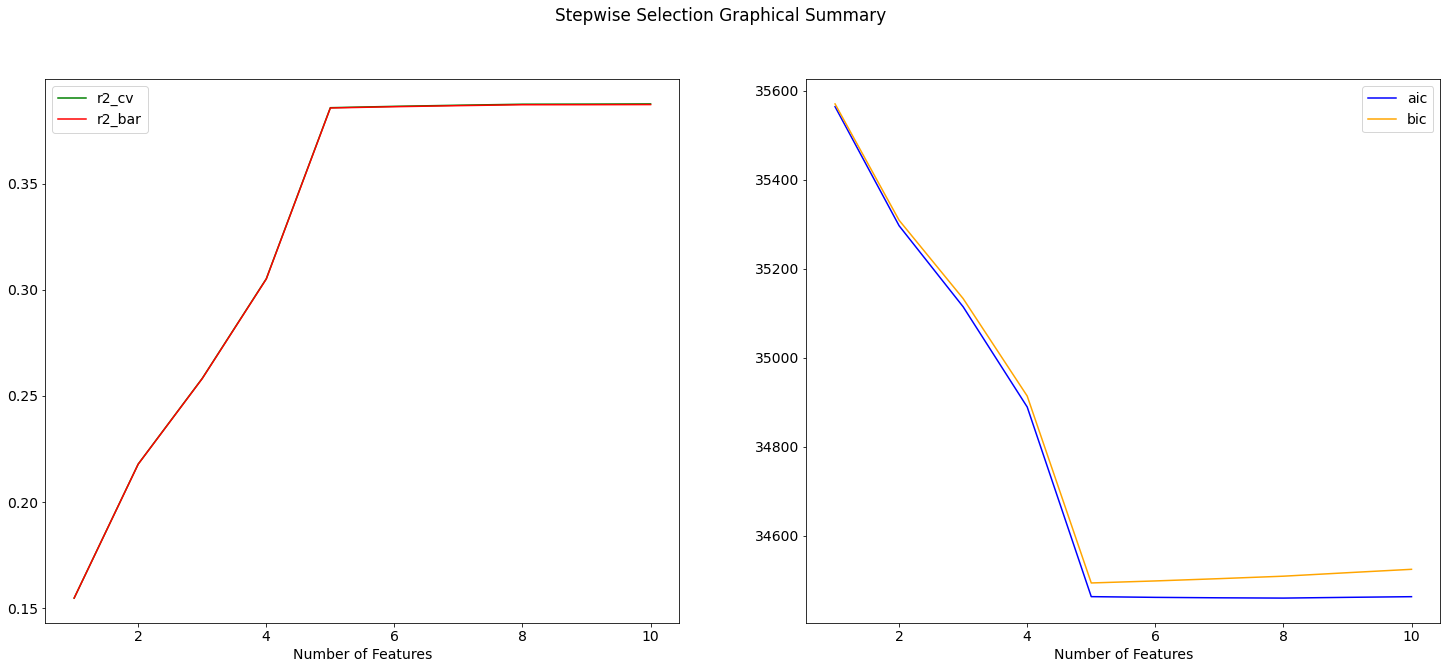

In [12]:
stepwiseSelection(model, X, y)

### Lasso Regression

In [13]:
model = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:16   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

[  3  84  67 ...   9 157 315]
[-21.8938738   90.3801895  122.34130659 ...  54.4641796   86.72570905
 192.86327734]
11
[ 40  32  36 ... 203 122 119]
[-58.72046198 -50.71097471  60.94212485 ... 177.67974788 210.78235937
 197.55509395]
11
[ 13   8  14 ... 224 247  49]
[-30.73203018   9.81569092  36.99576782 ... 143.18995895 188.51685937
 227.06328248]
11
[ 16 106 110 ... 157 214  61]
[-64.07815405 115.95363099 110.28081262 ... 122.00221249 193.21470189
 232.99224595]
11
[  1   1   2 ... 164  89  90]
[-18.59359649 -17.47647608 -16.38765267 ... 201.52047735 202.98680865
 216.18922832]
12
[  3  84  67 ...   9 157 315]
[-21.89387738  90.3801853  122.34129951 ...  54.46417969  86.72570861
 192.86327673]
12
[ 40  32  36 ... 203 122 119]
[-58.72043858 -50.71095137  60.94213685 ... 177.67974628 210.7823658
 197.55509008]
12
[ 13   8  14 ... 224 247  49]
[-30.7320297    9.81569082  36.99576765 ... 143.18995882 188.51685936
 227.06328049]
12
[ 16 106 110 ... 157 214  61]
[-64.07816292 115.9536303  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


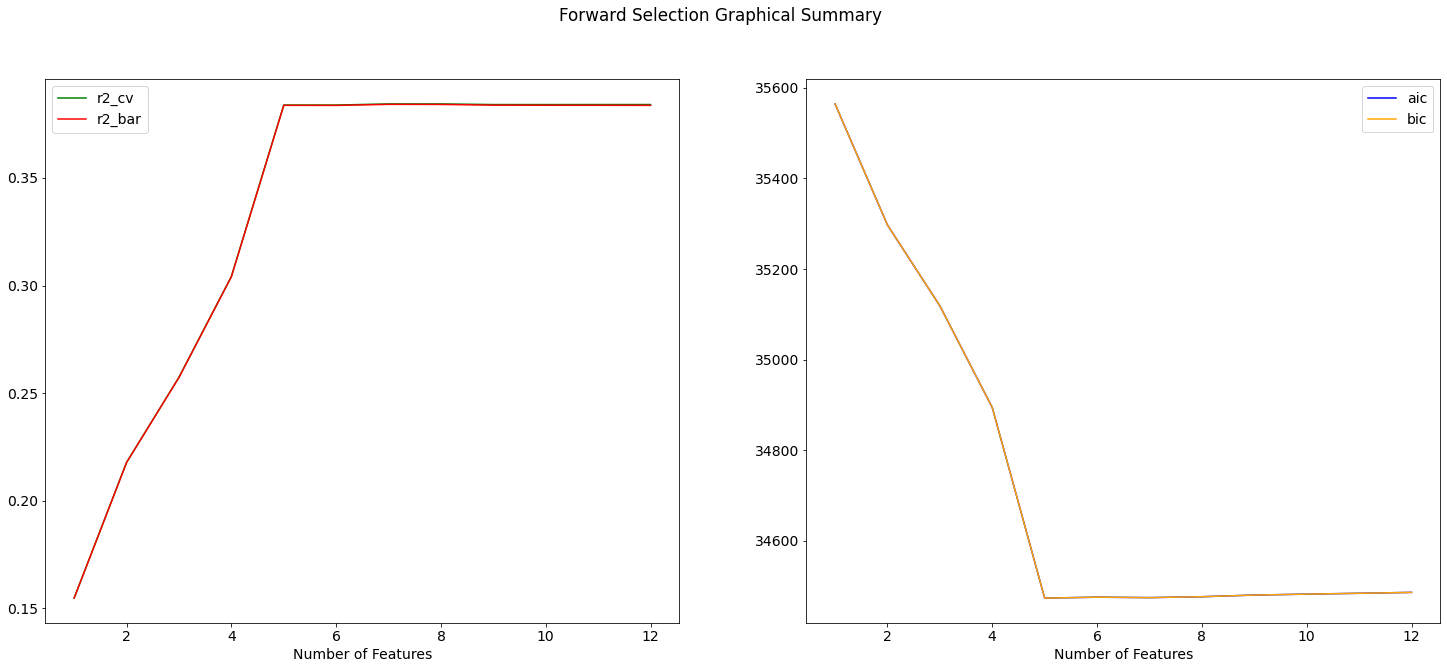

In [14]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:17   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


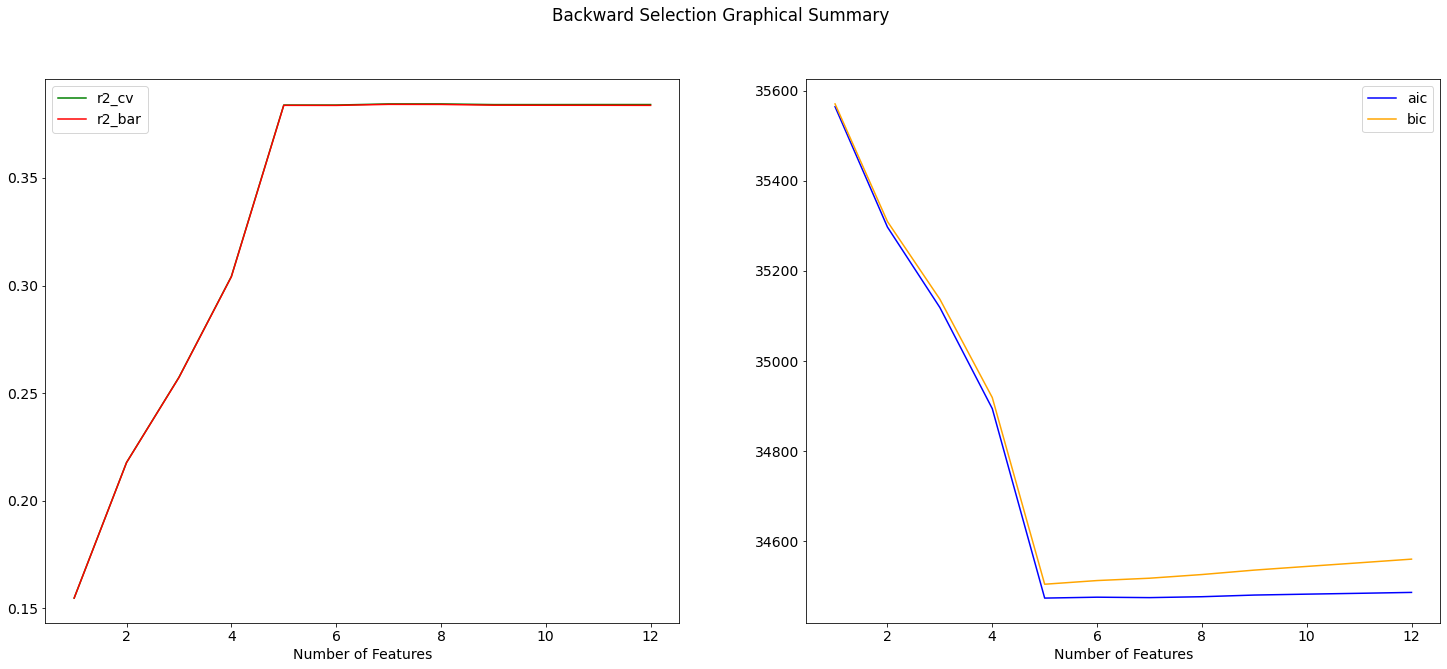

In [15]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:30:19   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


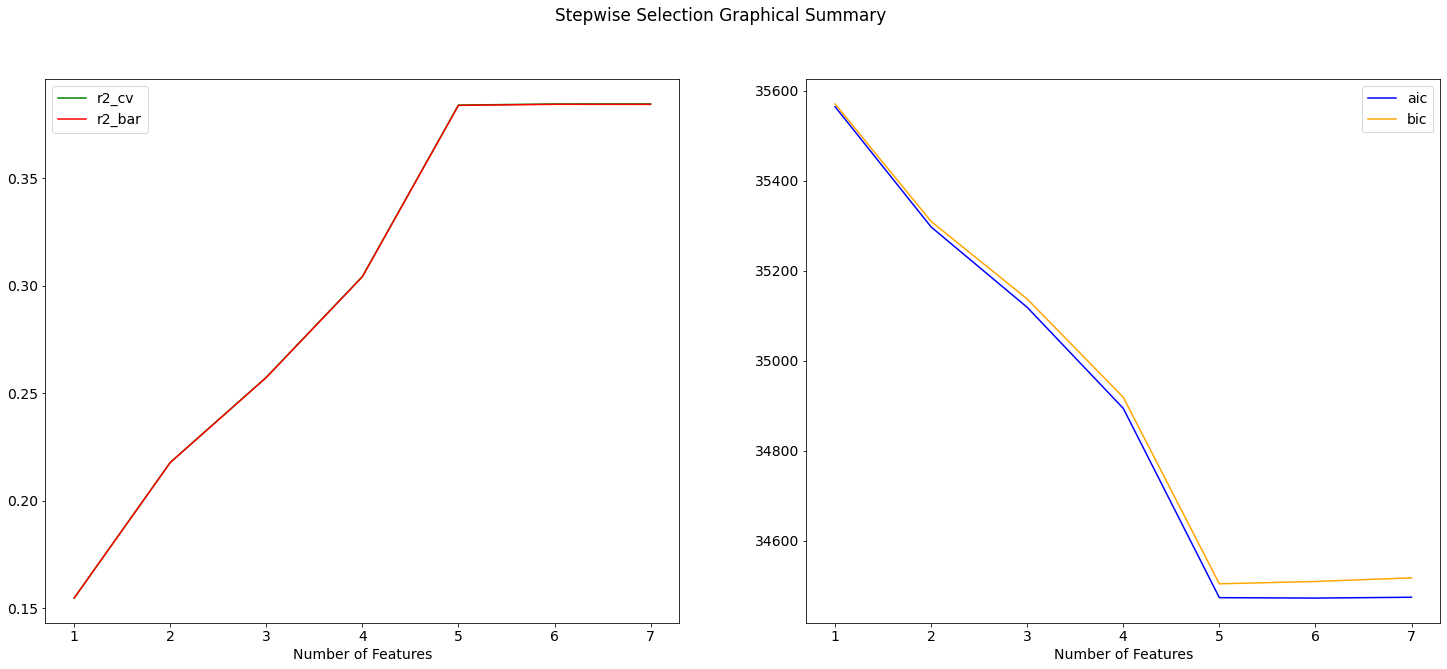

In [16]:
stepwiseSelection(model, X, y)

### Symbolic Regression

In [27]:
model = SymbolicRegressor()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:34:44   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573   

[ 40  32  36 ... 203 122 119]
[  5.96909068   8.67735087  44.69725077 ...  87.59880062 107.74246639
 101.13606551]
10
[ 13   8  14 ... 224 247  49]
[ 16.65585145  40.88214542  48.63510496 ...  75.71089987 103.72676418
 131.44827957]
10
[ 16 106 110 ... 157 214  61]
[  1.65068237  87.14269631  84.40942066 ...  46.97752474  97.37271994
 120.25499718]
10
[  1   1   2 ... 164  89  90]
[ 15.45060695  17.05718311  19.95706367 ... 136.63490906 127.44373901
 133.58502559]
11
[  3  84  67 ...   9 157 315]
[11.04841429 66.31650615 90.20467584 ... 26.11037623 34.79887872
 97.7735983 ]
11
[ 40  32  36 ... 203 122 119]
[  3.31648401   8.15494079  40.50809246 ... 111.66563248 136.39137166
  95.10462641]
11
[ 13   8  14 ... 224 247  49]
[ 18.52830188  38.11022534  49.68745139 ...  59.87336042  91.68044862
 125.49813744]
11
[ 16 106 110 ... 157 214  61]
[  7.30367544 100.85723418  99.06020884 ...  52.99342152  90.08396547
 111.3007695 ]
11
[  1   1   2 ... 164  89  90]
[ 12.74188013  16.48568192  17.8

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


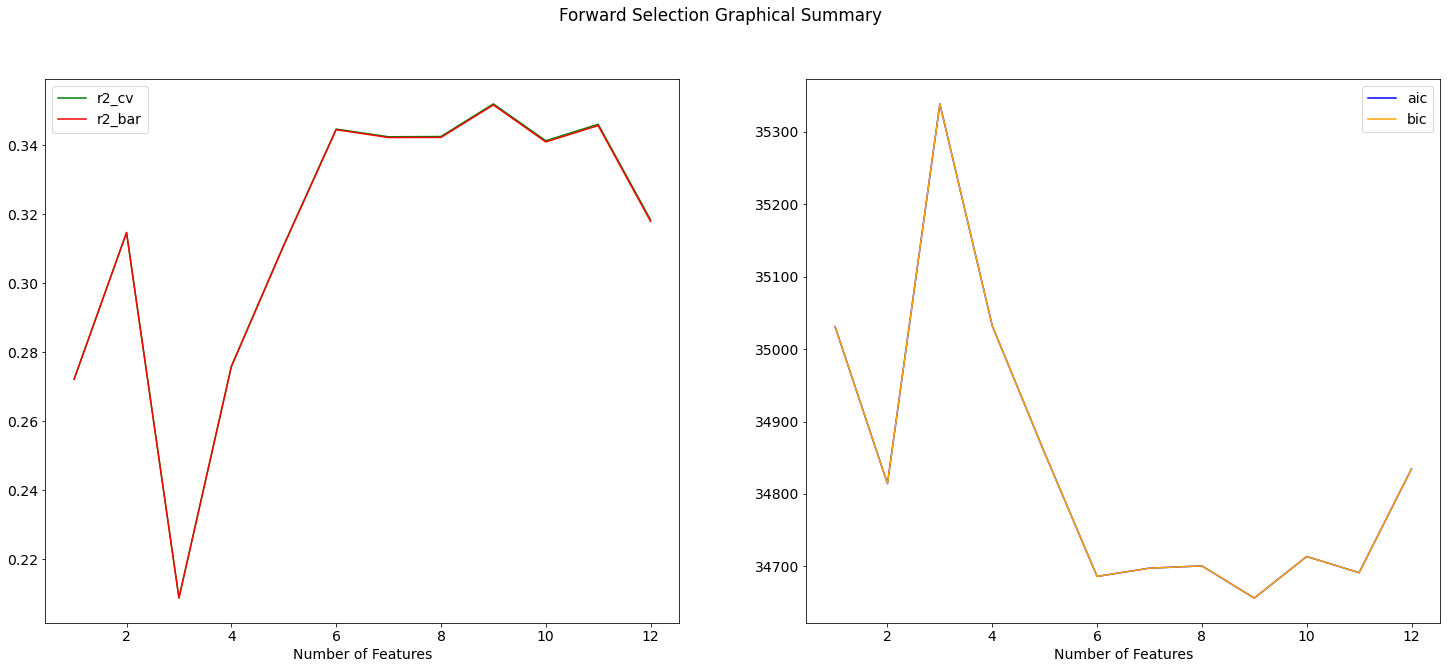

In [20]:
forwardSelection(model, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:56:41   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


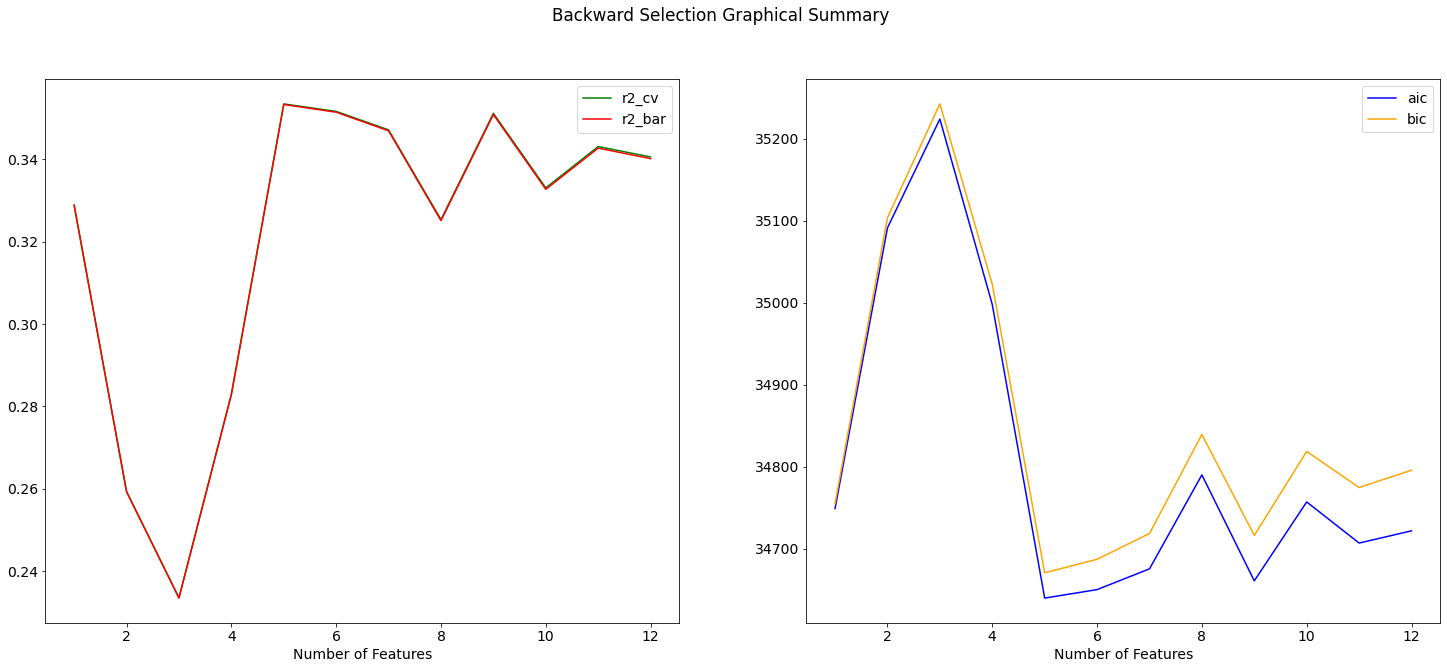

In [28]:
backwardSelection(model, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:24:00   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573  

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


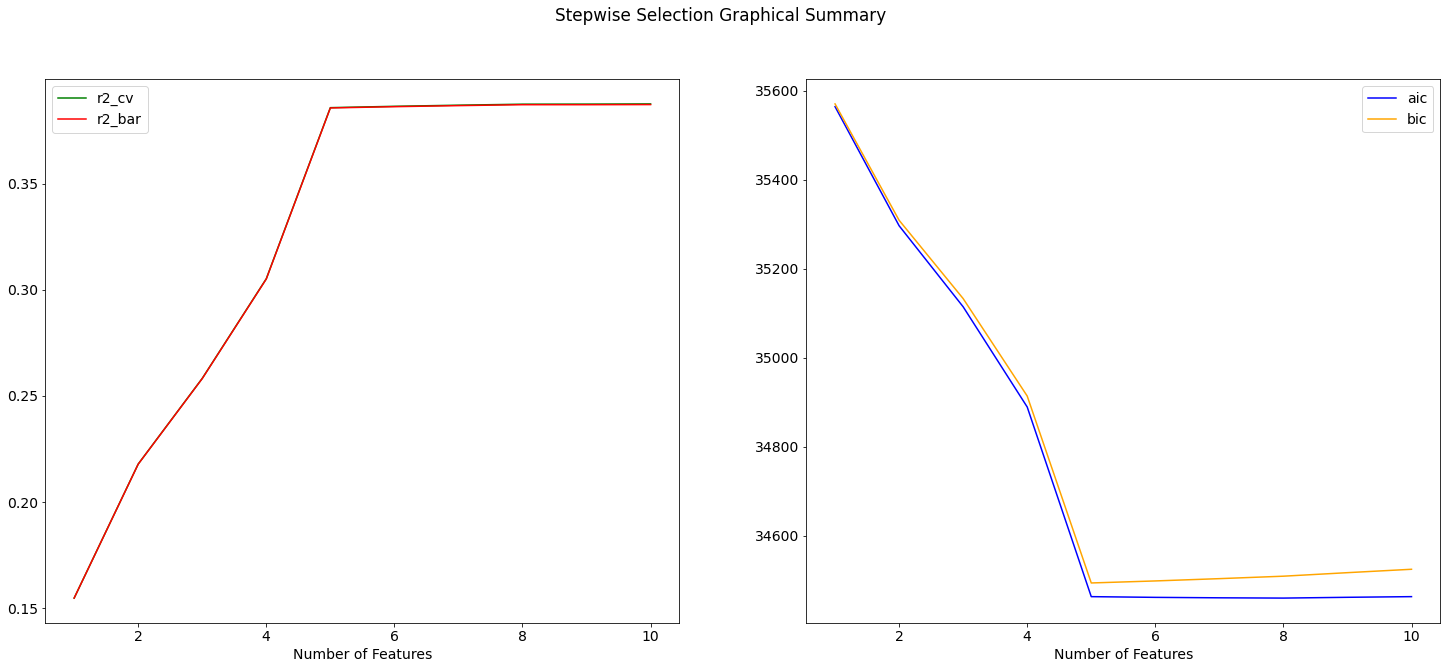

In [30]:
stepwiseSelection(model, X, y)

### Quadratic Regression

In [34]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
model = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y.reset_index(drop=True)
X_quad

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8^2,x8 x9,x8 x10,x8 x11,x9^2,x9 x10,x9 x11,x10^2,x10 x11,x11^2
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1944,0.000000,0.082886,0.233199,0.000000,0.6561,0.000000,0.000000
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.0484,0.059994,0.1760,0.000000,0.074365,0.218160,0.000000,0.6400,0.000000,0.000000
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.0484,0.059994,0.1760,0.000000,0.074365,0.218160,0.000000,0.6400,0.000000,0.000000
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1800,0.000000,0.082886,0.215925,0.000000,0.5625,0.000000,0.000000
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.0576,0.069096,0.1800,0.000000,0.082886,0.215925,0.000000,0.5625,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,...,0.0676,0.066976,0.1560,0.042692,0.066358,0.154560,0.042298,0.3600,0.098520,0.026962
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,...,0.0676,0.070902,0.1456,0.034918,0.074365,0.152712,0.036624,0.3136,0.075208,0.018036



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:04   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917   

[ 13   8  14 ... 224 247  49]
[ 61.60627291 210.56988514 230.70513555 ... 271.79594271 283.09402743
 174.58712004]
2
[ 16 106 110 ... 157 214  61]
[-65.69130653 282.55614142 283.25730791 ... 261.11372097 280.7353209
 197.91717545]
2
[  1   1   2 ... 164  89  90]
[102.18299229 134.60860041 163.86478742 ... 271.9525065  234.97650817
 216.69137861]
3
[  3  84  67 ...   9 157 315]
[188.48008279 271.39917819 275.22074701 ... 128.56501392 226.53930086
 279.94936099]
3
[ 40  32  36 ... 203 122 119]
[-15.52298502  26.48822832 248.66232858 ... 276.53820473 264.7982405
 252.13558434]
3
[ 13   8  14 ... 224 247  49]
[ 64.74089817 213.27707831 233.35166872 ... 270.76807953 282.71508707
 173.14200747]
3
[ 16 106 110 ... 157 214  61]
[-61.06205074 285.85409161 286.54020173 ... 259.44246413 279.95110541
 196.65363376]
3
[  1   1   2 ... 164  89  90]
[ 85.22989851 114.20862337 140.01581052 ... 332.29331018 306.66510864
 291.93104969]
4
[  3  84  67 ...   9 157 315]
[162.22404578 228.21658061 214.69833

[ 40  32  36 ... 203 122 119]
[-74.78865391 -43.49937235 159.44274005 ... 252.50936632 264.48674769
 252.14532847]
17
[ 13   8  14 ... 224 247  49]
[ -3.67542325  99.34572497 131.80549941 ... 239.75224081 270.13050231
 201.74878413]
17
[ 16 106 110 ... 157 214  61]
[-108.5695514   205.58476488  181.56325807 ...  218.62119558  269.6529116
  229.34323947]
17
[  1   1   2 ... 164  89  90]
[ 31.8383295   62.64263841  63.60054576 ... 250.23058474 213.59327223
 215.05356635]
18
[  3  84  67 ...   9 157 315]
[ 59.94022596 178.31894785 156.98735789 ...  58.34209311 148.41589137
 252.64563484]
18
[ 40  32  36 ... 203 122 119]
[-67.15062784 -34.93399366 163.35792498 ... 238.64193534 247.34396357
 226.95299919]
18
[ 13   8  14 ... 224 247  49]
[  2.94629214 110.10718734 138.52110812 ... 219.59799262 255.68682293
 173.65645062]
18
[ 16 106 110 ... 157 214  61]
[-103.50003402  207.97068625  187.1030262  ...  200.53858975  253.14175457
  207.60069247]
18
[  1   1   2 ... 164  89  90]
[ 26.04409262  

[  1   1   2 ... 164  89  90]
[ 39.71033072  75.46180882  58.23508988 ... 189.28190366 124.52275002
 121.70491631]
32
[  3  84  67 ...   9 157 315]
[ 45.88466368 160.21925606 125.52201674 ...  67.89754902 128.27436906
 212.51542712]
32
[ 40  32  36 ... 203 122 119]
[-44.77843436 -18.45464857 148.62978707 ... 207.24483387 180.07375482
 146.23436602]
32
[ 13   8  14 ... 224 247  49]
[ 17.31937159  96.03840955 125.5624008  ... 186.97418054 220.78530106
  61.66153074]
32
[ 16 106 110 ... 157 214  61]
[-72.97654471 186.97607602 159.67259895 ... 170.93500502 198.42279176
 108.87592038]
32
[  1   1   2 ... 164  89  90]
[ 44.94041693  77.03161508  64.30808127 ... 192.84622102 125.07942958
 122.93633005]
33
[  3  84  67 ...   9 157 315]
[ 50.68105177 161.97516632 126.94631061 ...  64.85053637 131.4444984
 212.9806616 ]
33
[ 40  32  36 ... 203 122 119]
[-38.76026735 -12.37934037 151.82067798 ... 206.32983962 182.04341341
 146.88006019]
33
[ 13   8  14 ... 224 247  49]
[ 21.58284875 100.56277979 

[  1   1   2 ... 164  89  90]
[ 39.78043373  75.32653312  59.87075583 ... 183.1398502  131.97242446
 134.05391284]
47
[  3  84  67 ...   9 157 315]
[ 53.9823095  159.32653813 128.34288652 ...  70.88123566 123.14657351
 204.84758589]
47
[ 40  32  36 ... 203 122 119]
[-43.92804886 -17.65275033 140.99068378 ... 202.04377983 175.90123616
 152.17375955]
47
[ 13   8  14 ... 224 247  49]
[ 25.96664084 104.26337438 141.17643826 ... 187.05864327 209.47662578
  70.50412463]
47
[ 16 106 110 ... 157 214  61]
[-59.6088998  189.45704756 160.89014363 ... 160.53451678 190.01915339
 111.47806476]
47
[  1   1   2 ... 164  89  90]
[ 39.62406745  76.52323095  59.72374492 ... 182.55946514 131.13435804
 133.97329351]
48
[  3  84  67 ...   9 157 315]
[ 53.9649392  159.30417547 128.42787815 ...  70.83686177 123.06925192
 204.76617253]
48
[ 40  32  36 ... 203 122 119]
[-43.92586148 -17.65051613 140.99322333 ... 202.05831586 175.91271511
 152.18708201]
48
[ 13   8  14 ... 224 247  49]
[ 25.7291047  103.99427537

[  1   1   2 ... 164  89  90]
[ 32.17684115  74.36109925  55.01169574 ... 191.56618578 123.4324149
 125.7183445 ]
61
[  3  84  67 ...   9 157 315]
[ 51.66925544 150.43241531 126.02993497 ...  41.61521464 110.67220641
 213.5086529 ]
61
[ 40  32  36 ... 203 122 119]
[-47.43514648 -20.77508763 134.68906876 ... 205.28281933 177.65089943
 143.91305517]
61
[ 13   8  14 ... 224 247  49]
[ 17.5464593   97.76664042 131.56182135 ... 175.06573438 210.48975178
  62.46395953]
61
[ 16 106 110 ... 157 214  61]
[-68.87520132 180.96635839 155.34768984 ... 149.61206333 184.41757955
 104.9803763 ]
61
[  1   1   2 ... 164  89  90]
[ 32.16738504  74.35854985  55.00173093 ... 191.56915876 123.43203183
 125.71795648]
62
[  3  84  67 ...   9 157 315]
[ 57.86145085 152.14117279 127.5781159  ...  43.25158255 109.62536424
 212.69593786]
62
[ 40  32  36 ... 203 122 119]
[-45.02672457 -18.37185072 135.77033916 ... 205.26595144 177.31407152
 143.96406875]
62
[ 13   8  14 ... 224 247  49]
[ 19.58909545  99.79808856 

[ 13   8  14 ... 224 247  49]
[ 22.1485209  102.26975828 135.97292065 ... 171.16715623 205.55645415
  62.51301213]
75
[ 16 106 110 ... 157 214  61]
[-63.58672251 183.22912841 157.76308203 ... 149.84487171 183.15628328
 102.37361825]
75
[  1   1   2 ... 164  89  90]
[ 35.52489479  76.14800187  58.20636541 ... 190.2079593  127.32032216
 130.57232553]
76
[  3  84  67 ...   9 157 315]
[ 60.82768255 153.26780668 128.52212931 ...  48.73669844 115.13868897
 214.27573503]
76
[ 40  32  36 ... 203 122 119]
[-43.07372514 -16.36658898 137.62597771 ... 198.75740261 172.33442245
 140.97509015]
76
[ 13   8  14 ... 224 247  49]
[ 22.2814791  102.39920777 136.07046523 ... 171.61322662 206.29775346
  63.01333935]
76
[ 16 106 110 ... 157 214  61]
[-63.87193818 183.19317842 157.75808654 ... 149.00981229 181.87129445
 101.11507527]
76
[  1   1   2 ... 164  89  90]
[ 34.21253724  76.26686579  56.6337077  ... 191.85199202 127.17639798
 130.40756288]
77
[  3  84  67 ...   9 157 315]
[ 62.30404552 154.19580805

[  1   1   2 ... 164  89  90]
[ 32.38836411  76.94545403  54.39399132 ... 187.54131808 126.00906186
 128.80440937]
90
[  3  84  67 ...   9 157 315]
[ 58.45077333 153.80092973 130.97675953 ...  54.15009404 109.55845943
 206.40715129]
90
[ 40  32  36 ... 203 122 119]
[-42.39654491 -15.62503498 137.34806484 ... 201.2631131  175.68489049
 142.00462834]
90
[ 13   8  14 ... 224 247  49]
[ 24.76261902 104.09699844 137.66386183 ... 172.54828565 206.40516978
  60.56468795]
90
[ 16 106 110 ... 157 214  61]
[-64.12990741 185.41236615 159.87968552 ... 146.74506374 179.65787733
 102.32264355]
90

FORWARD SELECTION SUMMARY TABLE:

Features In Order Added: ['x3^2', 'x3', 'x6 x10', 'x1 x3', 'x3 x10', 'x3 x6', 'x1 x10', 'x6 x7', 'x10^2', 'x8', 'x10', 'x7^2', 'x6', 'x6^2', 'x1 x6', 'x7', 'x1 x11', 'x1 x9', 'x0 x3', 'x9', 'x11^2', 'x3 x8', 'x8^2', 'x4 x10', 'x1 x5', 'x1 x8', 'x3 x7', 'x4 x6', 'x4', 'x4^2', 'x4 x5', 'x11', 'x9^2', 'x8 x10', 'x3 x11', 'x7 x11', 'x6 x9', 'x0', 'x8 x11', 'x2 x10', 'x0 x11', 

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


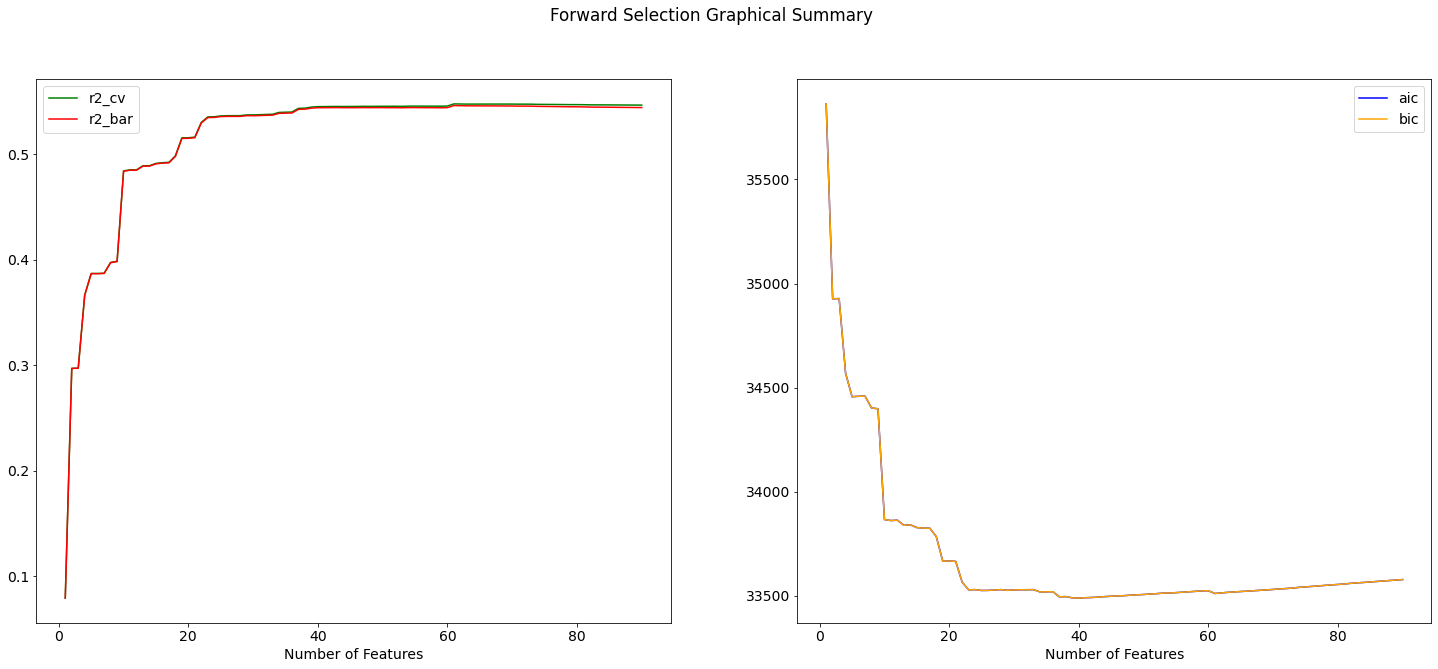

In [35]:
forwardSelection(model, X_quad, y_quad)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:20   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


BACKWARD SELECTION SUMMARY TABLE:

Features In Order Removed: ['x4 x9', 'x0 x7', 'x4 x8', 'x5 x11', 'x3 x9', 'x5 x6', 'x0^2', 'x6 x11', 'x2 x7', 'x0 x9', 'x1^2', 'x1', 'x10 x11', 'x2 x8', 'x0 x2', 'x5', 'x8 x9', 'x9 x11', 'x7 x9', 'x7 x8', 'x3 x4', 'x2', 'x0 x10', 'x2 x5', 'x5^2', 'x0 x1', 'x0 x5', 'x0 x6', 'x6 x8', 'x2 x9', 'x1 x2', 'x0 x8', 'x7 x10', 'x1 x4', 'x2 x3', 'x2 x6', 'x2^2', 'x2 x11', 'x5 x10', 'x1 x7', 'x3 x5', 'x2 x4', 'x5 x7', 'x9 x10', 'x0 x4', 'x4 x7', 'x5 x8', 'x5 x9', 'x4 x11', 'x0 x11', 'x2 x10', 'x8 x11', 'x0', 'x6 x9', 'x7 x11', 'x3 x11', 'x8 x10', 'x9^2', 'x11', 'x4 x5', 'x4^2', 'x4', 'x4 x6', 'x3 x7', 'x1 x8', 'x1 x5', 'x4 x10', 'x8^2', 'x3 x8', 'x11^2', 'x9', 'x0 x3', 'x1 x9', 'x1 x11', 'x7', 'x1 x6', 'x6^2', 'x6', 'x7^2', 'x10', 'x8', 'x10^2', 'x6 x7', 'x1 x10', 'x3 x6', 'x3 x10', 'x1 x3', 'x6 x10', 'x3', 'x3^2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        |       

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  print()


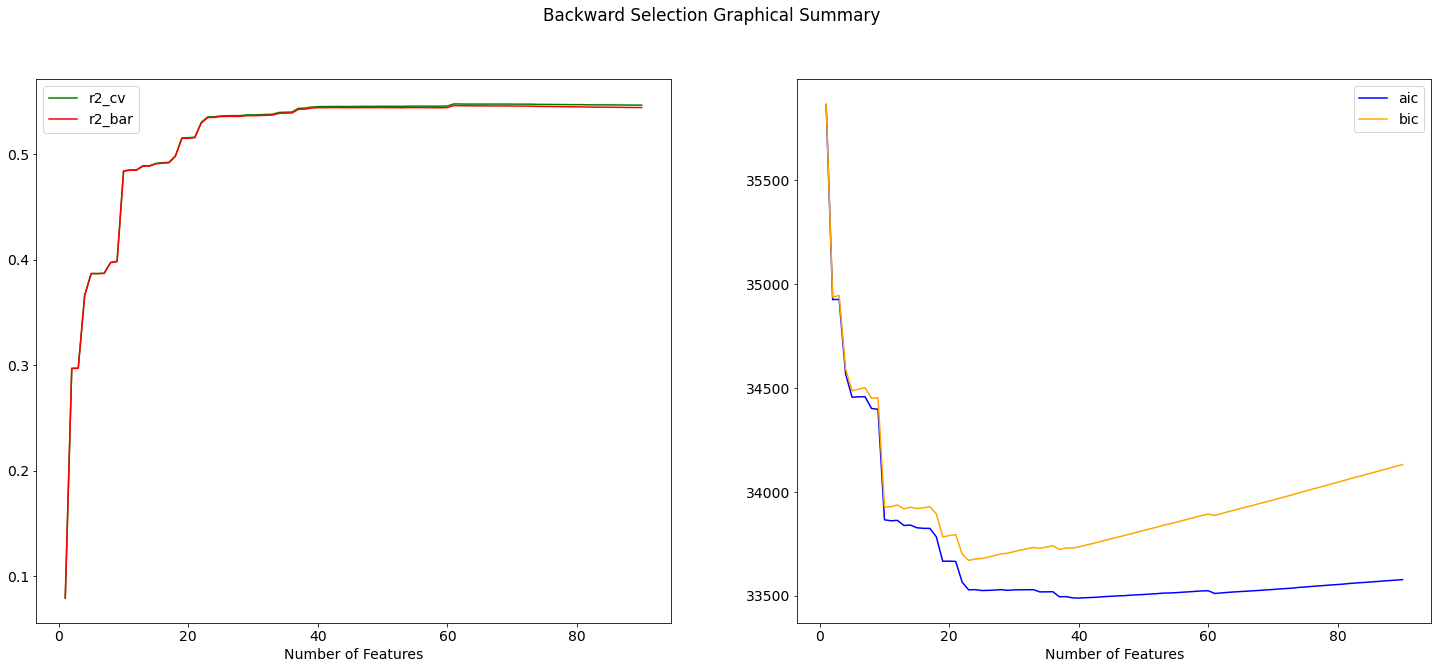

In [36]:
backwardSelection(model, X_quad, y_quad)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:38   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


STEPWISE SELECTION SUMMARY TABLE:

Features Added: ['x0 x4', 'x1 x3', 'x8 x9', 'x3 x7', 'x2 x11', 'x8 x10', 'x7 x8', 'x4 x8', 'x10^2', 'x10', 'x0 x2', 'x1 x10', 'x4^2', 'x6 x7', 'x3 x11', 'x9^2', 'x7', 'x8', 'x4 x9', 'x1 x7', 'x0 x9', 'x2 x9', 'x4', 'x11', 'x3 x5', 'x3 x10', 'x2 x3', 'x7^2', 'x5 x6', 'x6 x11', 'x2^2', 'x1^2', 'x9 x11', 'x3^2', 'x0^2', 'x5 x8', 'x4 x10', 'x6 x8', 'x2 x5', 'x7 x10', 'x1 x11', 'x3 x9', 'x0', 'x5 x7', 'x0 x10', 'x7 x11', 'x2 x10', 'x4 x6', 'x1 x8', 'x5 x9', 'x6^2', 'x8^2', 'x9 x10', 'x1 x6', 'x3 x8', 'x5']
Features Dropped: ['x2 x4', 'x3 x4', 'x1 x4', 'x2 x6', 'x5^2', 'x0 x1', 'x4 x5', 'x4 x7', 'x6 x9', 'x1', 'x11^2', 'x7 x9', 'x0 x3', 'x1 x9', 'x0 x6', 'x8 x11', 'x6 x10', 'x2 x8', 'x10 x11', 'x5 x11', 'x2 x7', 'x3 x6', 'x4 x11', 'x0 x7', 'x3', 'x1 x5', 'x0 x11', 'x6', 'x0 x5', 'x5 x10', 'x2', 'x0 x8', 'x9', 'x1 x2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  df_final = pd.DataFrame()


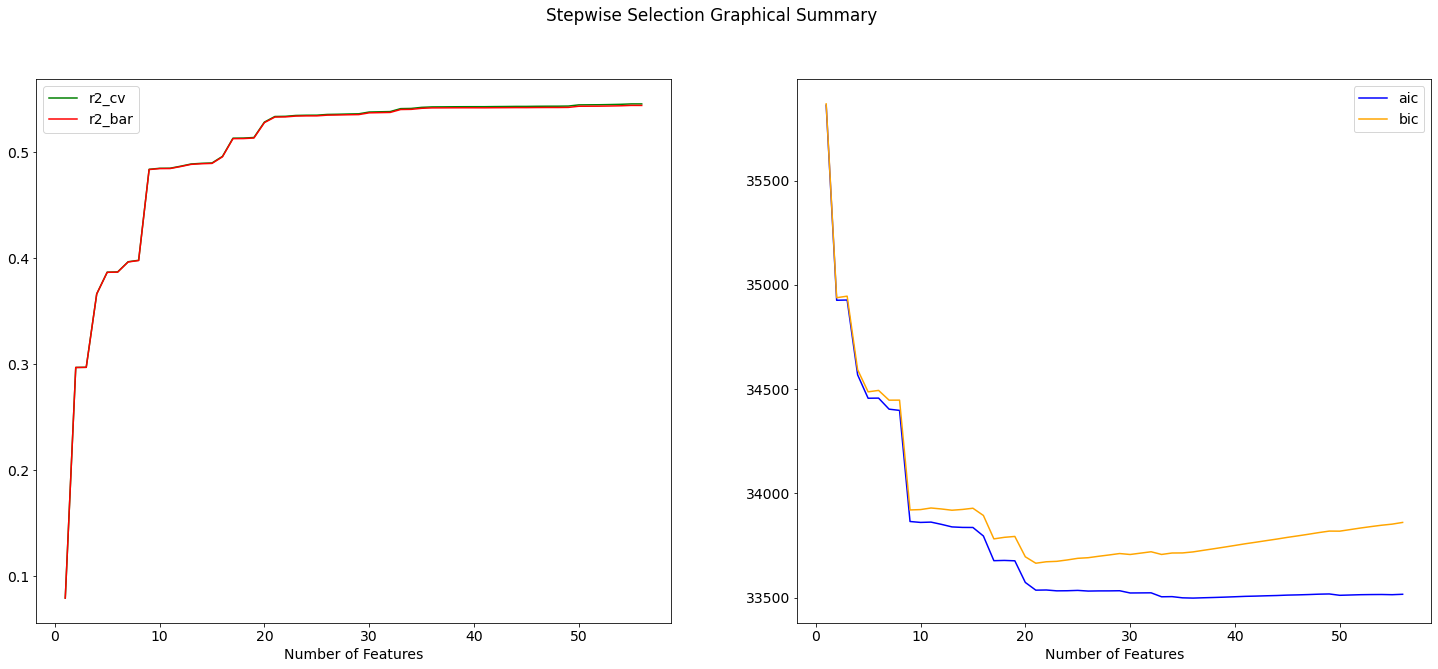

In [37]:
stepwiseSelection(model, X_quad, y_quad)

### Cubic Regression

In [38]:
cub_reg = PolynomialFeatures(degree=3)
X_cub = cub_reg.fit_transform(X)
X_cub = pd.DataFrame(X_cub, columns=cub_reg.get_feature_names())
model = linear_model.LinearRegression()
X_cub.apply(lambda col: col.reset_index(drop=True))
X_cub = X_cub.drop(columns = ["1"])
y_cub = y.reset_index(drop=True)
X_cub

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9^3,x9^2 x10,x9^2 x11,x9 x10^2,x9 x10 x11,x9 x11^2,x10^3,x10^2 x11,x10 x11^2,x11^3
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.067138,0.000000,0.188891,0.000000,0.000000,0.531441,0.000000,0.000000,0.000000
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.020279,0.059492,0.000000,0.174528,0.000000,0.000000,0.512000,0.000000,0.000000,0.000000
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,...,0.020279,0.059492,0.000000,0.174528,0.000000,0.000000,0.512000,0.000000,0.000000,0.000000
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.062165,0.000000,0.161944,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,...,0.023863,0.062165,0.000000,0.161944,0.000000,0.000000,0.421875,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,...,0.017094,0.039815,0.010896,0.092736,0.025379,0.006945,0.216000,0.059112,0.016177,0.004427
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,...,0.020279,0.041645,0.009987,0.085519,0.020509,0.004919,0.175616,0.042116,0.010100,0.002422



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:28:50   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917   

[ 13   8  14 ... 224 247  49]
[ 61.60627291 210.56988514 230.70513555 ... 271.79594271 283.09402743
 174.58712004]
2
[ 16 106 110 ... 157 214  61]
[-65.69130653 282.55614142 283.25730791 ... 261.11372097 280.7353209
 197.91717545]
2
[  1   1   2 ... 164  89  90]
[102.18299229 134.60860041 163.86478742 ... 271.9525065  234.97650817
 216.69137861]
3
[  3  84  67 ...   9 157 315]
[188.48008279 271.39917819 275.22074701 ... 128.56501392 226.53930086
 279.94936099]
3
[ 40  32  36 ... 203 122 119]
[-15.52298502  26.48822832 248.66232858 ... 276.53820473 264.7982405
 252.13558434]
3
[ 13   8  14 ... 224 247  49]
[ 64.74089817 213.27707831 233.35166872 ... 270.76807953 282.71508707
 173.14200747]
3
[ 16 106 110 ... 157 214  61]
[-61.06205074 285.85409161 286.54020173 ... 259.44246413 279.95110541
 196.65363376]
3
[  1   1   2 ... 164  89  90]
[ 85.22989851 114.20862337 140.01581052 ... 332.29331018 306.66510864
 291.93104969]
4
[  3  84  67 ...   9 157 315]
[162.22404578 228.21658061 214.69833

[  1   1   2 ... 164  89  90]
[ 31.8383295   62.64263841  63.60054576 ... 250.23058474 213.59327223
 215.05356635]
18
[  3  84  67 ...   9 157 315]
[ 59.94022596 178.31894785 156.98735789 ...  58.34209311 148.41589137
 252.64563484]
18
[ 40  32  36 ... 203 122 119]
[-67.15062784 -34.93399366 163.35792498 ... 238.64193534 247.34396357
 226.95299919]
18
[ 13   8  14 ... 224 247  49]
[  2.94629214 110.10718734 138.52110812 ... 219.59799262 255.68682293
 173.65645062]
18
[ 16 106 110 ... 157 214  61]
[-103.50003402  207.97068625  187.1030262  ...  200.53858975  253.14175457
  207.60069247]
18
[  1   1   2 ... 164  89  90]
[ 26.04409262  56.0442934   53.35925379 ... 218.45780514 170.9952129
 168.91850126]
19
[  3  84  67 ...   9 157 315]
[ 48.27495939 145.19504901 111.70491295 ...  55.7323109  135.02744285
 226.6488486 ]
19
[ 40  32  36 ... 203 122 119]
[-63.24295596 -33.82709945 136.87758205 ... 217.16723383 212.9811671
 185.97810235]
19
[ 13   8  14 ... 224 247  49]
[3.26513237e-02 9.3838

[ 13   8  14 ... 224 247  49]
[ 17.31937159  96.03840955 125.5624008  ... 186.97418054 220.78530106
  61.66153074]
32
[ 16 106 110 ... 157 214  61]
[-72.97654471 186.97607602 159.67259895 ... 170.93500502 198.42279176
 108.87592038]
32
[  1   1   2 ... 164  89  90]
[ 44.94041693  77.03161508  64.30808127 ... 192.84622102 125.07942958
 122.93633005]
33
[  3  84  67 ...   9 157 315]
[ 50.68105177 161.97516632 126.94631061 ...  64.85053637 131.4444984
 212.9806616 ]
33
[ 40  32  36 ... 203 122 119]
[-38.76026735 -12.37934037 151.82067798 ... 206.32983962 182.04341341
 146.88006019]
33
[ 13   8  14 ... 224 247  49]
[ 21.58284875 100.56277979 127.13450677 ... 185.03890006 220.32793599
  65.06015152]
33
[ 16 106 110 ... 157 214  61]
[-67.67160085 189.25079164 162.36172716 ... 172.26657075 198.25311463
 112.79893216]
33
[  1   1   2 ... 164  89  90]
[ 44.57325051  80.73982953  65.9751249  ... 183.96961069 128.73325927
 127.49195736]
34
[  3  84  67 ...   9 157 315]
[ 55.61256662 164.40051934 

[  1   1   2 ... 164  89  90]
[ 39.78043373  75.32653312  59.87075583 ... 183.1398502  131.97242446
 134.05391284]
47
[  3  84  67 ...   9 157 315]
[ 53.9823095  159.32653813 128.34288652 ...  70.88123566 123.14657351
 204.84758589]
47
[ 40  32  36 ... 203 122 119]
[-43.92804886 -17.65275033 140.99068378 ... 202.04377983 175.90123616
 152.17375955]
47
[ 13   8  14 ... 224 247  49]
[ 25.96664084 104.26337438 141.17643826 ... 187.05864327 209.47662578
  70.50412463]
47
[ 16 106 110 ... 157 214  61]
[-59.6088998  189.45704756 160.89014363 ... 160.53451678 190.01915339
 111.47806476]
47
[  1   1   2 ... 164  89  90]
[ 39.62406745  76.52323095  59.72374492 ... 182.55946514 131.13435804
 133.97329351]
48
[  3  84  67 ...   9 157 315]
[ 53.9649392  159.30417547 128.42787815 ...  70.83686177 123.06925192
 204.76617253]
48
[ 40  32  36 ... 203 122 119]
[-43.92586148 -17.65051613 140.99322333 ... 202.05831586 175.91271511
 152.18708201]
48
[ 13   8  14 ... 224 247  49]
[ 25.7291047  103.99427537

[ 13   8  14 ... 224 247  49]
[ 17.5464593   97.76664042 131.56182135 ... 175.06573438 210.48975178
  62.46395953]
61
[ 16 106 110 ... 157 214  61]
[-68.87520132 180.96635839 155.34768984 ... 149.61206333 184.41757955
 104.9803763 ]
61
[  1   1   2 ... 164  89  90]
[ 32.16738504  74.35854985  55.00173093 ... 191.56915876 123.43203183
 125.71795648]
62
[  3  84  67 ...   9 157 315]
[ 57.86145085 152.14117279 127.5781159  ...  43.25158255 109.62536424
 212.69593786]
62
[ 40  32  36 ... 203 122 119]
[-45.02672457 -18.37185072 135.77033916 ... 205.26595144 177.31407152
 143.96406875]
62
[ 13   8  14 ... 224 247  49]
[ 19.58909545  99.79808856 132.9202976  ... 175.28815182 210.58581141
  62.16612942]
62
[ 16 106 110 ... 157 214  61]
[-64.03151551 182.21986692 156.84842534 ... 149.92278647 184.6690561
 104.52919227]
62
[  1   1   2 ... 164  89  90]
[ 31.76765832  74.288275    54.6785652  ... 196.68698168 128.20099016
 130.56748854]
63
[  3  84  67 ...   9 157 315]
[ 57.51015005 151.43986068 

[ 16 106 110 ... 157 214  61]
[-63.58672251 183.22912841 157.76308203 ... 149.84487171 183.15628328
 102.37361825]
75
[  1   1   2 ... 164  89  90]
[ 35.52489479  76.14800187  58.20636541 ... 190.2079593  127.32032216
 130.57232553]
76
[  3  84  67 ...   9 157 315]
[ 60.82768255 153.26780668 128.52212931 ...  48.73669844 115.13868897
 214.27573503]
76
[ 40  32  36 ... 203 122 119]
[-43.07372514 -16.36658898 137.62597771 ... 198.75740261 172.33442245
 140.97509015]
76
[ 13   8  14 ... 224 247  49]
[ 22.2814791  102.39920777 136.07046523 ... 171.61322662 206.29775346
  63.01333935]
76
[ 16 106 110 ... 157 214  61]
[-63.87193818 183.19317842 157.75808654 ... 149.00981229 181.87129445
 101.11507527]
76
[  1   1   2 ... 164  89  90]
[ 34.21253724  76.26686579  56.6337077  ... 191.85199202 127.17639798
 130.40756288]
77
[  3  84  67 ...   9 157 315]
[ 62.30404552 154.19580805 129.26758684 ...  49.27091129 113.70735844
 213.98325793]
77
[ 40  32  36 ... 203 122 119]
[-42.13742053 -15.42717466

[  3  84  67 ...   9 157 315]
[ 58.45077333 153.80092973 130.97675953 ...  54.15009404 109.55845943
 206.40715129]
90
[ 40  32  36 ... 203 122 119]
[-42.39654491 -15.62503498 137.34806484 ... 201.2631131  175.68489049
 142.00462834]
90
[ 13   8  14 ... 224 247  49]
[ 24.76261902 104.09699844 137.66386183 ... 172.54828565 206.40516978
  60.56468795]
90
[ 16 106 110 ... 157 214  61]
[-64.12990741 185.41236615 159.87968552 ... 146.74506374 179.65787733
 102.32264355]
90

FORWARD SELECTION SUMMARY TABLE:

Features In Order Added: ['x3^2', 'x3', 'x6 x10', 'x1 x3', 'x3 x10', 'x3 x6', 'x1 x10', 'x6 x7', 'x10^2', 'x8', 'x10', 'x7^2', 'x6', 'x6^2', 'x1 x6', 'x7', 'x1 x11', 'x1 x9', 'x0 x3', 'x9', 'x11^2', 'x3 x8', 'x8^2', 'x4 x10', 'x1 x5', 'x1 x8', 'x3 x7', 'x4 x6', 'x4', 'x4^2', 'x4 x5', 'x11', 'x9^2', 'x8 x10', 'x3 x11', 'x7 x11', 'x6 x9', 'x0', 'x8 x11', 'x2 x10', 'x0 x11', 'x4 x11', 'x5 x9', 'x5 x8', 'x4 x7', 'x0 x4', 'x9 x10', 'x5 x7', 'x2 x4', 'x3 x5', 'x1 x7', 'x5 x10', 'x2 x11', 'x2^2'

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:221: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


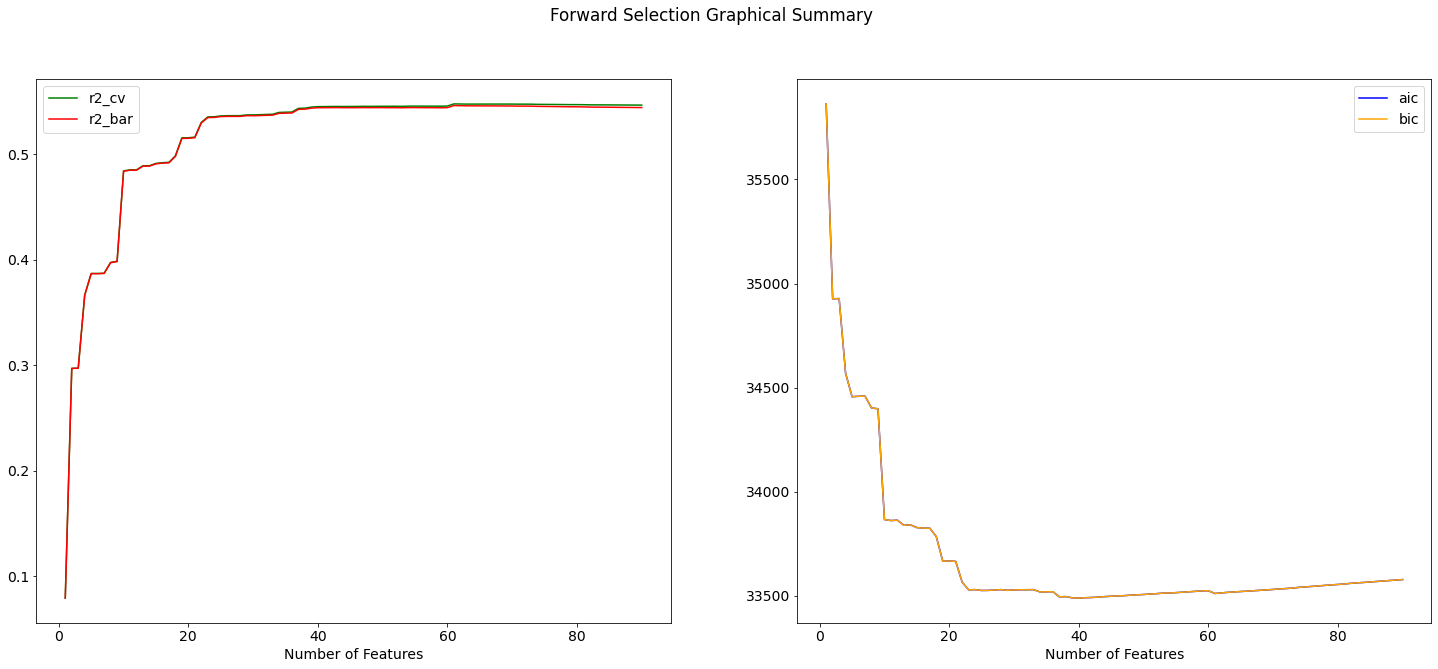

In [39]:
forwardSelection(model, X_quad, y_quad)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:29:04   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


BACKWARD SELECTION SUMMARY TABLE:

Features In Order Removed: ['x4 x9', 'x0 x7', 'x4 x8', 'x5 x11', 'x3 x9', 'x5 x6', 'x0^2', 'x6 x11', 'x2 x7', 'x0 x9', 'x1^2', 'x1', 'x10 x11', 'x2 x8', 'x0 x2', 'x5', 'x8 x9', 'x9 x11', 'x7 x9', 'x7 x8', 'x3 x4', 'x2', 'x0 x10', 'x2 x5', 'x5^2', 'x0 x1', 'x0 x5', 'x0 x6', 'x6 x8', 'x2 x9', 'x1 x2', 'x0 x8', 'x7 x10', 'x1 x4', 'x2 x3', 'x2 x6', 'x2^2', 'x2 x11', 'x5 x10', 'x1 x7', 'x3 x5', 'x2 x4', 'x5 x7', 'x9 x10', 'x0 x4', 'x4 x7', 'x5 x8', 'x5 x9', 'x4 x11', 'x0 x11', 'x2 x10', 'x8 x11', 'x0', 'x6 x9', 'x7 x11', 'x3 x11', 'x8 x10', 'x9^2', 'x11', 'x4 x5', 'x4^2', 'x4', 'x4 x6', 'x3 x7', 'x1 x8', 'x1 x5', 'x4 x10', 'x8^2', 'x3 x8', 'x11^2', 'x9', 'x0 x3', 'x1 x9', 'x1 x11', 'x7', 'x1 x6', 'x6^2', 'x6', 'x7^2', 'x10', 'x8', 'x10^2', 'x6 x7', 'x1 x10', 'x3 x6', 'x3 x10', 'x1 x3', 'x6 x10', 'x3', 'x3^2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        |       

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:323: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  print()


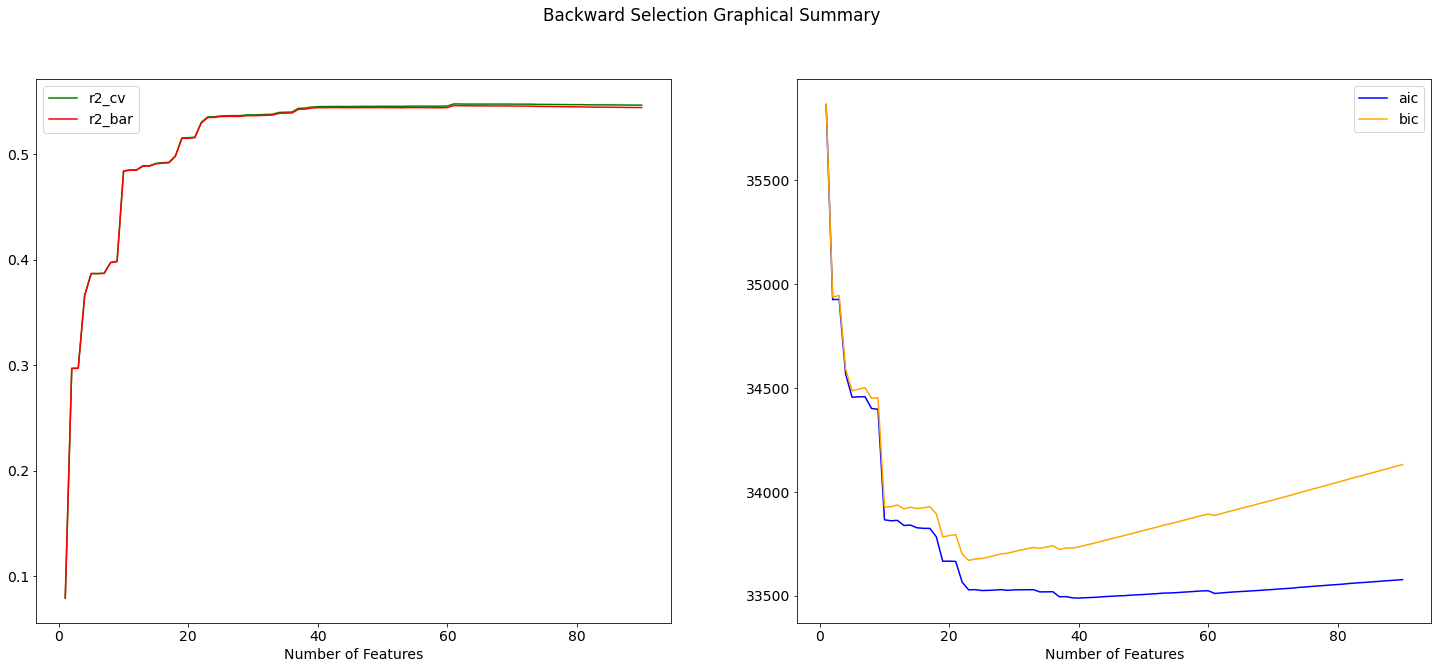

In [40]:
backwardSelection(model, X_quad, y_quad)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     246.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:29:19   Log-Likelihood:            -1.0809e+05
No. Observations:               17379   AIC:                         2.164e+05
Df Residuals:                   17292   BIC:                         2.170e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -228.6917  


STEPWISE SELECTION SUMMARY TABLE:

Features Added: ['x0 x4', 'x1 x3', 'x8 x9', 'x3 x7', 'x2 x11', 'x8 x10', 'x7 x8', 'x4 x8', 'x10^2', 'x10', 'x0 x2', 'x1 x10', 'x4^2', 'x6 x7', 'x3 x11', 'x9^2', 'x7', 'x8', 'x4 x9', 'x1 x7', 'x0 x9', 'x2 x9', 'x4', 'x11', 'x3 x5', 'x3 x10', 'x2 x3', 'x7^2', 'x5 x6', 'x6 x11', 'x2^2', 'x1^2', 'x9 x11', 'x3^2', 'x0^2', 'x5 x8', 'x4 x10', 'x6 x8', 'x2 x5', 'x7 x10', 'x1 x11', 'x3 x9', 'x0', 'x5 x7', 'x0 x10', 'x7 x11', 'x2 x10', 'x4 x6', 'x1 x8', 'x5 x9', 'x6^2', 'x8^2', 'x9 x10', 'x1 x6', 'x3 x8', 'x5']
Features Dropped: ['x2 x4', 'x3 x4', 'x1 x4', 'x2 x6', 'x5^2', 'x0 x1', 'x4 x5', 'x4 x7', 'x6 x9', 'x1', 'x11^2', 'x7 x9', 'x0 x3', 'x1 x9', 'x0 x6', 'x8 x11', 'x6 x10', 'x2 x8', 'x10 x11', 'x5 x11', 'x2 x7', 'x3 x6', 'x4 x11', 'x0 x7', 'x3', 'x1 x5', 'x0 x11', 'x6', 'x0 x5', 'x5 x10', 'x2', 'x0 x8', 'x9', 'x1 x2']
+--------------+---------------------+---------------------+--------------------+--------------------+
| Num_Features |        r2_cv        

C:\Users\techn\PycharmProjects\DS2_P1\python\Model_Parent_2.py:443: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  df_final = pd.DataFrame()


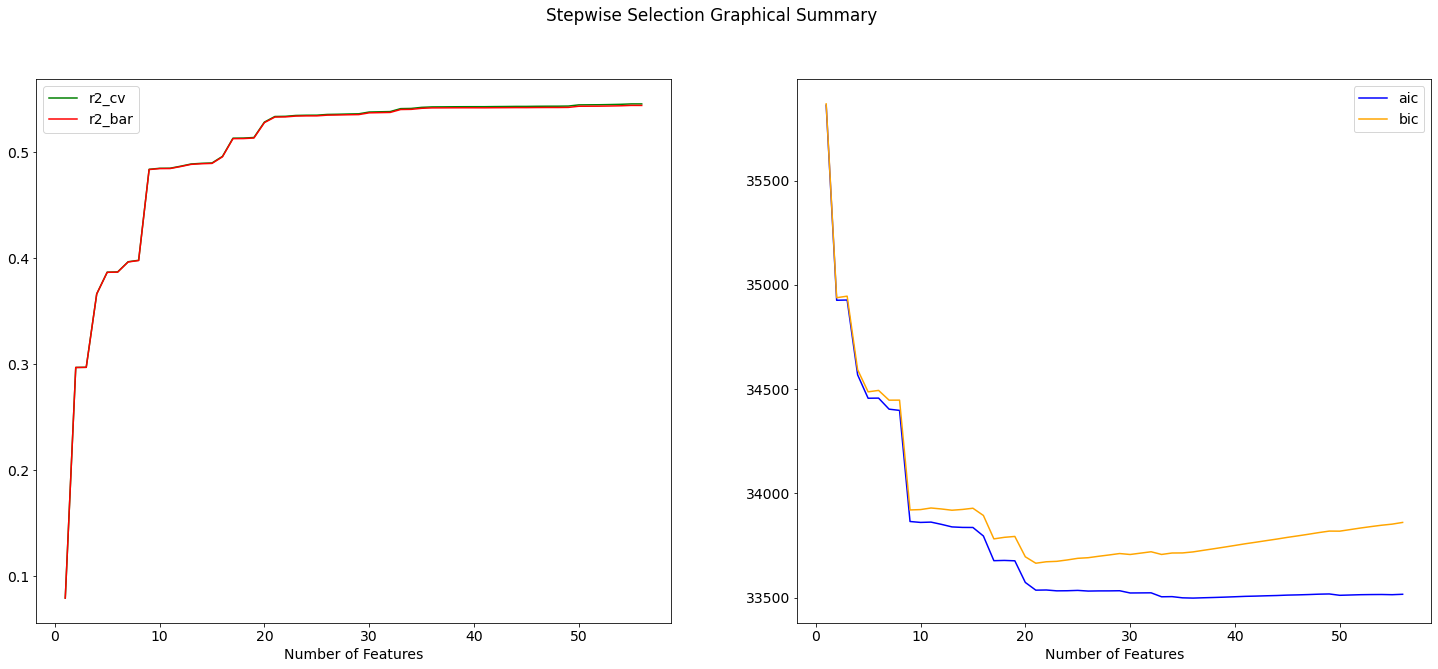

In [41]:
stepwiseSelection(model, X_quad, y_quad)